# Figure S01: GWAS simulations to optimize mapping panel strain

selection

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
source("bin/outs.R")



Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'flextable'

The following objects are masked from 'package:kableExtra':

    as_image, footnote

The following object is masked from 'package:purrr':

    compose

here() starts at /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript

$strain_table
$strain_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.html"

$strain_table$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.tsv.zip"

$strain_table$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.docx"

$strain_table$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.csv"


$tox_table_ft
$tox_table_ft$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.html"

$tox_table_ft$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.tsv.zip"

$tox_table_ft$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.docx"

$tox_table_ft$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.csv"


$trait_table
$trait_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S3/table_S3.html"

$trait_table$tsv
[1] "

# Inputs

-   `sim_data_fn`: path to the simulation data RDS file. When loaded a dataframe named `simulation.metrics.df` is added to the env

In [ ]:
sim_data_fn <- "data/raw/simulations/NemaScan_Performance.SummerGWA_Sims_LiberalSwept192.20210506.RData"


# Functions

In [ ]:
expand_sims <- function(df) {
  df %>%
    tidyr::separate(col = sim, into = c("nQTL", "Rep", "h2", "MAF", "effect_range", "population"), sep = "_") %>%
    dplyr::mutate(
      nQTL = as.integer(nQTL),
      Rep = as.integer(Rep),
      h2 = as.numeric(h2),
      MAF = as.numeric(MAF),
      effect_range = as.factor(effect_range),
      population = as.factor(population)
    )
}


# Main

In [ ]:
load(sim_data_fn)

summer.GWA.dat.6.lib.swept.192 <- simulation.metrics.df %>%
  tidyr::separate(col = sim,
                  into = c("nQTL","Rep","h2","MAF","effect_range","strain_set"), 
                  sep = "_", remove = F) %>%
  tidyr::separate(col = QTL,
                  into = c("CHROM","POS"), 
                  sep = ":", remove = F) %>%
  dplyr::mutate(h2 = as.factor(h2),
                nQTL = as.factor(nQTL),
                POS = as.numeric(POS),
                startPOS = as.numeric(startPOS),
                peakPOS = as.numeric(peakPOS),
                endPOS = as.numeric(endPOS),
                interval.var.exp  = as.numeric(interval.var.exp),
                Simulated.QTL.VarExp = as.numeric(Simulated.QTL.VarExp), 
                peak_id = as.numeric(peak_id),
                BETA = as.numeric(BETA),
                Effect = as.numeric(Effect),
                Frequency = as.numeric(Frequency),
                log10p = dplyr::if_else(Simulated == FALSE, true = interval.log10p, false = log10p), # false discoveries inherit the log10p value of the peak marker for the interval
                log10p = as.numeric(log10p),
                interval_size = as.numeric(interval_size),
                aboveBF = dplyr::case_when(aboveBF == 1 ~ TRUE, 
                                           aboveBF == 0 ~ FALSE,
                                           is.na(aboveBF) ~ TRUE), # false discoveries by definition exceed significance threshold
                aboveBF = as.factor(aboveBF)) %>%
  dplyr::filter(!c(Detected == FALSE & aboveBF == TRUE),
                CHROM != 7)


Designate the QTL detections code pulled from SamW script `summerGWA.Rmd` (`/vast/eande106/rdss/LabFolders/PastMembers/SamW/projects/NemaScan_StrainSetSims/analysis/summerGWA.Rmd`)

In [ ]:
designations <- summer.GWA.dat.6.lib.swept.192 %>%
  dplyr::filter(algorithm == "MIXED") %>%
  droplevels() %>%
  dplyr::mutate(designation = case_when(Simulated == TRUE & Detected == TRUE & aboveBF == TRUE ~ "Detected.CV",
                                        Simulated == TRUE & Detected == FALSE & aboveBF == FALSE ~ "Missed.CV",
                                        Simulated == TRUE & Detected == TRUE & aboveBF == FALSE ~ "CV.Not.Significant.In.Interval",
                                        Simulated == FALSE & Detected == TRUE & aboveBF == TRUE ~ "False.Discovery")) %>%
  tidyr::separate(col = detected.peak,
                  into = c("peak.CHROM","peak.POS"), 
                  sep = ":", remove = F) %>%
  dplyr::mutate(QTL.v.peak = abs(as.numeric(POS)-as.numeric(peak.POS))) %>%
  dplyr::group_by(designation, strain_set, nQTL, h2, Rep) %>%
  dplyr::summarise(n = n()) %>%
  tidyr::pivot_wider(names_from = designation, values_from = n)


`summarise()` has grouped output by 'designation', 'strain_set', 'nQTL', 'h2'.
You can override using the `.groups` argument.

Calculate detection power using code pulled from the same script

In [ ]:
Power <- designations %>%
  dplyr::mutate(Simulated = as.numeric(as.character(nQTL)),
                Power = Detected.CV/Simulated,
                Artefact.Rate = False.Discovery/Detected,
                Detected.CV.NS.Rate = CV.Not.Significant.In.Interval/Detected) %>%
  dplyr::ungroup() %>%
  dplyr::group_by(strain_set, h2) %>%
  dplyr::summarise(mean.Power = mean(Power),
                   sd.Power = sd(Power),
                   n = n())


`summarise()` has grouped output by 'strain_set'. You can override using the
`.groups` argument.

Calculate false discovery rate (artefact rate) using code pulled from the same script

In [ ]:
Artefact.Rate <- designations %>%
  dplyr::mutate(Simulated = as.numeric(as.character(nQTL)),
                Power = Detected.CV/Simulated,
                Artefact.Rate = False.Discovery/Detected,
                Detected.CV.NS.Rate = CV.Not.Significant.In.Interval/Detected) %>%
  dplyr::ungroup() %>%
  dplyr::group_by(strain_set, h2) %>%
  dplyr::mutate(Artefact.Rate = if_else(is.na(Artefact.Rate), true = 0, false = Artefact.Rate)) %>%
  dplyr::summarise(mean.Artefact.Rate = mean(Artefact.Rate),
                   sd.Artefact.Rate = sd(Artefact.Rate),
                   n = n()) 


`summarise()` has grouped output by 'strain_set'. You can override using the
`.groups` argument.

Combine power and artefact rate into a single dataframe

In [ ]:
summer.GWA.perform <- Power %>%
  dplyr::full_join(.,Artefact.Rate)


Joining with `by = join_by(strain_set, h2, n)`

Add plotting code for figure

In [ ]:
sim_performance <- summer.GWA.perform %>%
  # highlight the population of interacts - underground.gartersnake
  dplyr::mutate(ssoi = ifelse(strain_set == "underground.gartersnake", TRUE, FALSE)) %>%
  ggplot(aes(x = mean.Power, y = mean.Artefact.Rate)) +
  geom_point(aes(color = ssoi)) +
  ggrepel::geom_text_repel(data = . %>% filter(ssoi == TRUE), 
                  aes(label = strain_set), 
                  size = 3,
                  box.padding = 1,
                  point.padding = 0.5,
                  min.segment.length = 0,
                  nudge_y = -0.02,
                  show.legend = FALSE) +
  scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black")) +
  labs(x = "Average Detection Power", y = "Average FDR") +
  guides(color = "none") +
  theme_bw() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  facet_wrap(~h2) 


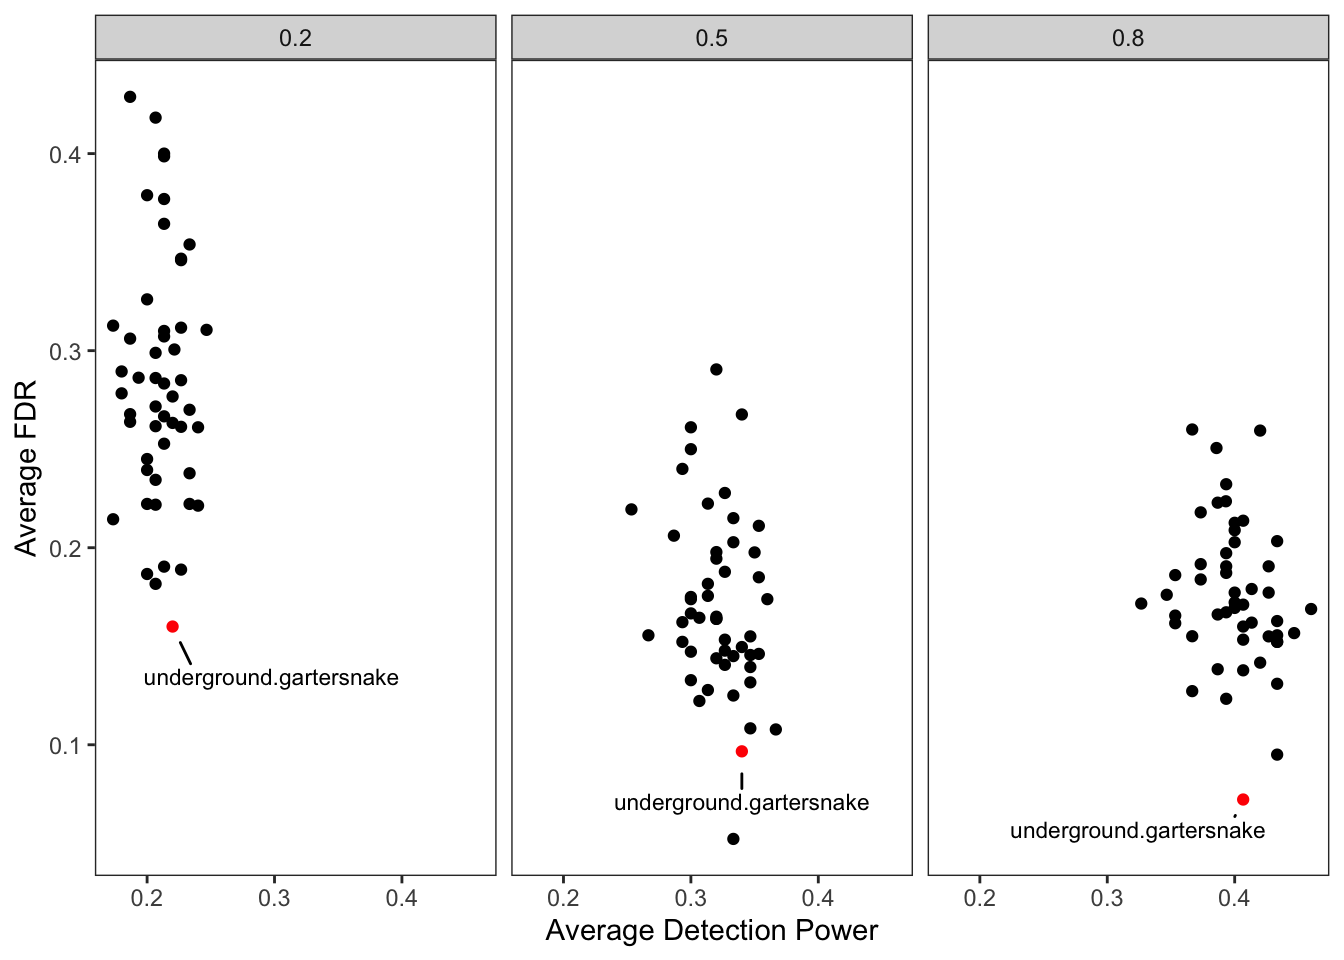

In [ ]:
sim_performance


Save the plot

In [ ]:
save_plot(sim_performance, sup_figure_fns$sim_performance, w_in = 7.5, h_in = 5)
